In [72]:
import nltk
import spacy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
spacy = sp.load('en_core_web_lg')

In [6]:
df = pd.read_csv('goodreads-bookreviews.csv',index_col=0)
df.head()

,title,synopsis,avg_rating,published_date,review,rating
0,Atomic Habits: An Easy & Proven Way to Build G...,NaN,4.36,"['October', '16,', '2018']",A Book That Changed My LifeA book worth readin...,5.0
1,The Alchemist,NaN,3.91,"['January', '1,', '1988']",It's the possibility of having a dream come tr...,5.0
2,The 7 Habits of Highly Effective People: Power...,NaN,4.16,"['January', '1,', '1989']",This book explains 7 principles that make a pe...,4.0
3,The Subtle Art of Not Giving a F*ck: A Counter...,NaN,3.89,"['January', '1,', '2016']","If you follow my reviews/blog at all, you prob...",3.0
4,Who Moved My Cheese?,NaN,3.86,"['January', '1,', '1999']",SPOILER ALERT! I am going to save anyone who t...,1.0


In [23]:
nltk.word_tokenize(df.loc[4]['review'])

['SPOILER',
 'ALERT',
 '!',
 'I',
 'am',
 'going',
 'to',
 'save',
 'anyone',
 'who',
 'thinks',
 'they',
 'need',
 'to',
 'read',
 'this',
 'book',
 'time',
 '&',
 'money',
 'by',
 'summarizing',
 'the',
 'entire',
 'book',
 'in',
 'the',
 'next',
 'two',
 'sentences',
 ':',
 'Things',
 'change',
 '.',
 'Learn',
 'to',
 'adapt.You',
 "'re",
 'welcome',
 '.',
 'If',
 'you',
 'still',
 'feel',
 'the',
 'need',
 'to',
 'spend',
 'money',
 'please',
 'contact',
 'me',
 '&',
 'I',
 'will',
 'tell',
 'you',
 'where',
 'to',
 'send',
 'it',
 '.']

In [31]:
doc = spacy(df.loc[4]['review'])
len(doc)

63

## NLTK Sentiment Analysis - VADER

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [36]:
vader = SentimentIntensityAnalyzer()

In [46]:
vader.polarity_scores(df.loc[4]['review'])

{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.8984}

In [63]:
vader_scores = []
for _ , row in df.iterrows():
    vader_scores.append(vader.polarity_scores(row.review))

In [71]:
df = pd.concat([df,pd.DataFrame(vader_scores)],axis=1)

<Axes: xlabel='rating', ylabel='compound'>

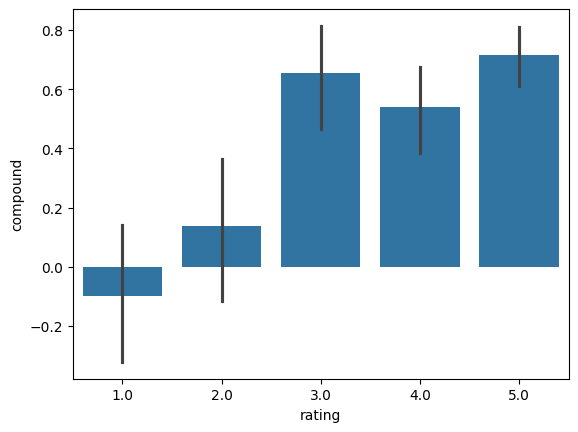

In [74]:
sns.barplot(df,x='rating',y='compound')

In [75]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [76]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
roberta = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\maab9\anaconda3\envs\NLP\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\maab9\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.
